In [18]:
# Library Import
import pandas as pd

# Data Import
df=pd.read_csv('VAT_Dataset.csv', sep=";")

# Change column names to a standard
df.rename(columns={'ID_x': 'Customer_ID', 'Country_x': 'Country','VAT': 'Check_Column'}, inplace=True)

# Show top 5 rows
df.head()


,Customer_ID,Country,Check_Column
0,10000,TT,GB025054289
1,10001,CC,4445323240
2,10002,TT,EW372073490
3,10003,RR,AET48794415
4,10004,QQ,19072238691043


In [19]:
df.shape

(18060, 3)

In [20]:
df.loc[(df['Check_Column'].isnull())]

,Customer_ID,Country,Check_Column
975,10975,MM,NaN
3846,13846,TT,NaN
6296,16296,TT,NaN
10679,20679,TT,NaN
14992,24992,QQ,NaN
15055,25055,TT,NaN
15099,25099,VV,NaN
18030,28030,MM,NaN


In [21]:
# List missing value
df.loc[(df['Check_Column'].isnull())]

# Drop rows where Check_Column is missing
df=df.dropna(subset=['Check_Column'])

# Reset index for dropped rows
df.reset_index(inplace=True, drop=True)

# The new size of df
df.shape

(18052, 3)

<AxesSubplot:xlabel='Country', ylabel='Customer Count'>

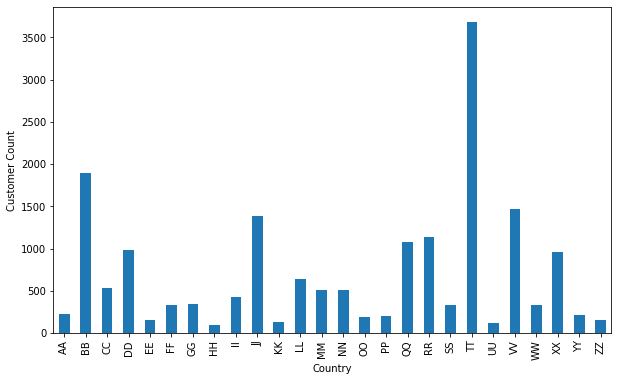

In [22]:
# Group by country
dfg = df.groupby(['Country']).size()

# Plot
dfg.plot(kind='bar', ylabel='Customer Count',
         xlabel='Country', figsize=(10, 6))

# Section 1 - Pattern Frequency

### List all characters used in the column

In [23]:
# 1. String conversion
df['Check_Column']=df['Check_Column'].map(str)

# 2. Split function definition
def split(text):
    return [x for x in text]

# 3. Split records
df['Check_Column_Split']=df['Check_Column'].apply(split)

# Show top 5 records
df.head()

,Customer_ID,Country,Check_Column,Check_Column_Split
0,10000,TT,GB025054289,"[G, B, 0, 2, 5, 0, 5, 4, 2, 8, 9]"
1,10001,CC,4445323240,"[4, 4, 4, 5, 3, 2, 3, 2, 4, 0]"
2,10002,TT,EW372073490,"[E, W, 3, 7, 2, 0, 7, 3, 4, 9, 0]"
3,10003,RR,AET48794415,"[A, E, T, 4, 8, 7, 9, 4, 4, 1, 5]"
4,10004,QQ,19072238691043,"[1, 9, 0, 7, 2, 2, 3, 8, 6, 9, 1, 0, 4, 3]"


## Overview of all characters (Optional Section)

In [24]:
lst = list(range(1,10000))
lst_1=[chr(item) for item in lst]

In [25]:
df_all_ascii = pd.DataFrame()
df_all_ascii['Ord']  = lst
df_all_ascii['Chr']  = lst_1
df_all_ascii['Type']  = df_all_ascii['Chr'].apply(type)
print(df_all_ascii.loc[1200:1300])

       Ord Chr           Type
1200  1201   ұ  <class 'str'>
1201  1202   Ҳ  <class 'str'>
1202  1203   ҳ  <class 'str'>
1203  1204   Ҵ  <class 'str'>
1204  1205   ҵ  <class 'str'>
...    ...  ..            ...
1296  1297   ԑ  <class 'str'>
1297  1298   Ԓ  <class 'str'>
1298  1299   ԓ  <class 'str'>
1299  1300   Ԕ  <class 'str'>
1300  1301   ԕ  <class 'str'>

[101 rows x 3 columns]


## Ascii code decoder
Ascii codes<br>
<48 Chr_1<br>
<58 Num<br>
<65 Chr_2<br>
<91 Let<br>
<97 Chr_3<br>
<123 Let<br>
Chr_4

In [26]:
print("ASCII code of Ä: " + str(ord("Ä")))
print("ASCII code of Ç: " + str(ord("Ç")))
print("ASCII code of ä: " + str(ord("ä")))
print("ASCII code of ç: " + str(ord("ç")))

ASCII code of Ä: 196
ASCII code of Ç: 199
ASCII code of ä: 228
ASCII code of ç: 231


In [27]:
# Create function
def ascii_translator(text_list):
    result=[]
    for x in text_list:
        x=ord(x)
        if x in (196,199,228,231):
            result.append("L")
        elif 32<=x<=47 or 58<=x<=64 or 91<=x<=96 or 123<=x:
            result.append("S")
        elif 65<=x<=90 or 97<=x<=122:
            result.append("L")
        elif 48<=x<=57:
            result.append("N")
        else:
            result.append("error")
    return '-'.join(result)

# Apply function to df
df['Check_Column_Translated']=df['Check_Column_Split'].apply(ascii_translator)

# Show top 5 rows
df.head()

,Customer_ID,Country,Check_Column,Check_Column_Split,Check_Column_Translated
0,10000,TT,GB025054289,"[G, B, 0, 2, 5, 0, 5, 4, 2, 8, 9]",L-L-N-N-N-N-N-N-N-N-N
1,10001,CC,4445323240,"[4, 4, 4, 5, 3, 2, 3, 2, 4, 0]",N-N-N-N-N-N-N-N-N-N
2,10002,TT,EW372073490,"[E, W, 3, 7, 2, 0, 7, 3, 4, 9, 0]",L-L-N-N-N-N-N-N-N-N-N
3,10003,RR,AET48794415,"[A, E, T, 4, 8, 7, 9, 4, 4, 1, 5]",L-L-L-N-N-N-N-N-N-N-N
4,10004,QQ,19072238691043,"[1, 9, 0, 7, 2, 2, 3, 8, 6, 9, 1, 0, 4, 3]",N-N-N-N-N-N-N-N-N-N-N-N-N-N


In [28]:
# 1. Number of patterns by country
dfg_1 = df.groupby(['Country','Check_Column_Translated']).size().to_frame(name = 'Pattern_Count').reset_index()

# 2. Number of total customers by country
dfg_2 = df.groupby(['Country']).size().to_frame(name = 'Country_Subtotal').reset_index()

# 3. Merge both grouped tables
grp_tbl = pd.merge(dfg_1, dfg_2, how='inner', on=['Country'])

# 4. Pattern currency calculation
grp_tbl['Pattern_Pct']=grp_tbl['Pattern_Count']/grp_tbl['Country_Subtotal']

# Show top rows
grp_tbl.head()

,Country,Check_Column_Translated,Pattern_Count,Country_Subtotal,Pattern_Pct
0,AA,L-L-N-N-N-N-N-N-N-N,224,231,0.969697
1,AA,L-L-N-N-N-N-N-N-N-N-N-L-L-L,1,231,0.004329
2,AA,N-N-N-N-N-N-N,1,231,0.004329
3,AA,N-N-N-N-N-N-N-N,1,231,0.004329
4,AA,N-N-N-N-N-N-N-N-N,3,231,0.012987


<AxesSubplot:xlabel='Pattern', ylabel='Pattern Pct'>

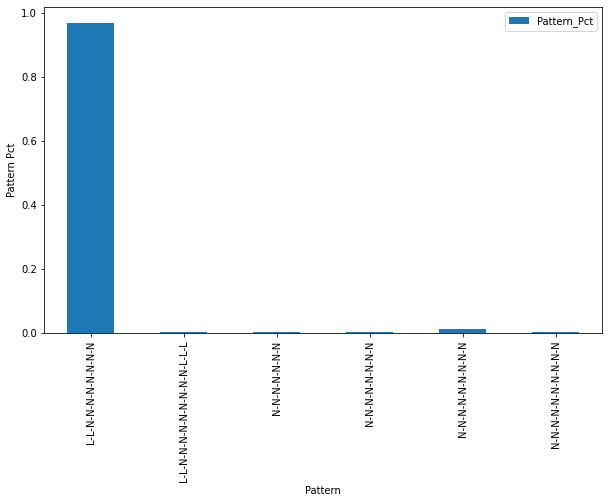

In [29]:
# Filter and remove unusued columns
dfg=grp_tbl[grp_tbl['Country']=="AA"][['Check_Column_Translated','Pattern_Pct']]

# Plot
dfg.plot(x='Check_Column_Translated',y='Pattern_Pct',kind='bar', ylabel='Pattern Pct',
         xlabel='Pattern', figsize=(10, 6))

<AxesSubplot:xlabel='Country', ylabel='Pattern Pct'>

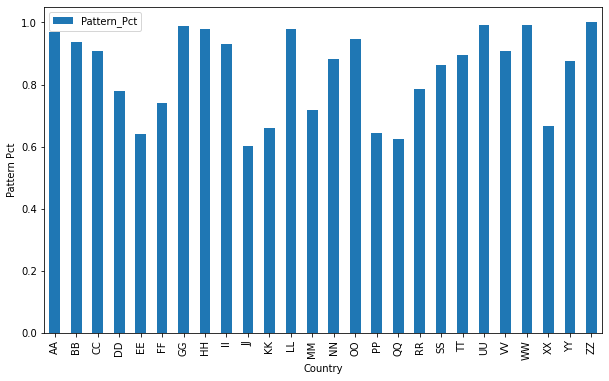

In [39]:
# Group by country max pattern pct (We keep Check_Column_Translated to be used in Reporting section)
grp_cntry_max=grp_tbl.loc[grp_tbl.groupby('Country')['Pattern_Pct'].idxmax()][['Country','Check_Column_Translated','Pattern_Pct']]

# Plot
grp_cntry_max[['Country','Pattern_Pct']].plot(x='Country',y='Pattern_Pct',kind='bar', ylabel='Pattern Pct',
         xlabel='Country', figsize=(10, 6))

In [46]:
# Merge customer level table with country-pattern level table
df_all_temp = pd.merge(df, grp_tbl, how='inner', on=['Country','Check_Column_Translated'])

# Remove unused column
df_all_temp.drop('Check_Column_Split',1,inplace=True)

# Show table
df_all_temp

C:\Users\capcierd\AppData\Local\Temp/ipykernel_5664/1232681924.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_all_temp.drop('Check_Column_Split',1,inplace=True)


,Customer_ID,Country,Check_Column,Check_Column_Translated,Pattern_Count,Country_Subtotal,Pattern_Pct
0,10000,TT,GB025054289,L-L-N-N-N-N-N-N-N-N-N,3297,3677,0.896655
1,10002,TT,EW372073490,L-L-N-N-N-N-N-N-N-N-N,3297,3677,0.896655
2,10008,TT,DE031273762,L-L-N-N-N-N-N-N-N-N-N,3297,3677,0.896655
3,10009,TT,WA607196889,L-L-N-N-N-N-N-N-N-N-N,3297,3677,0.896655
4,10012,TT,ZG659741703,L-L-N-N-N-N-N-N-N-N-N,3297,3677,0.896655
...,...,...,...,...,...,...,...
18047,27439,VV,NN228147105,L-L-N-N-N-N-N-N-N-N-N,1,1465,0.000683
18048,27460,XX,66332051YBT2071,N-N-N-N-N-N-N-N-L-L-L-N-N-N-N,1,965,0.001036
18049,27543,AA,7014018,N-N-N-N-N-N-N,1,231,0.004329
18050,27794,BB,61-6582698,N-N-S-N-N-N-N-N-N-N,1,1899,0.000527


In [47]:
# Assign threshold
threshold=0.01

# Filter customer that are under threshold
df_all = df_all_temp[df_all_temp.Pattern_Pct<=threshold].reset_index()

# Show df_all
df_all

,index,Customer_ID,Country,Check_Column,Check_Column_Translated,Pattern_Count,Country_Subtotal,Pattern_Pct
0,16762,10231,RR,F8517214/H,L-N-N-N-N-N-N-N-S-L,1,1140,0.000877
1,16805,10270,XX,87486328RQ76B6Z,N-N-N-N-N-N-N-N-L-L-N-N-L-N-L,6,965,0.006218
2,16806,14234,XX,58114317ID38U0X,N-N-N-N-N-N-N-N-L-L-N-N-L-N-L,6,965,0.006218
3,16807,16410,XX,24667500ZA34T6F,N-N-N-N-N-N-N-N-L-L-N-N-L-N-L,6,965,0.006218
4,16808,20415,XX,61783454QV05U9Q,N-N-N-N-N-N-N-N-L-L-N-N-L-N-L,6,965,0.006218
...,...,...,...,...,...,...,...,...
387,18047,27439,VV,NN228147105,L-L-N-N-N-N-N-N-N-N-N,1,1465,0.000683
388,18048,27460,XX,66332051YBT2071,N-N-N-N-N-N-N-N-L-L-L-N-N-N-N,1,965,0.001036
389,18049,27543,AA,7014018,N-N-N-N-N-N-N,1,231,0.004329
390,18050,27794,BB,61-6582698,N-N-S-N-N-N-N-N-N-N,1,1899,0.000527


In [48]:
grp_cntry_max.head()

,Country,MC_Pattern,MC_Pttrn_Pct
0,AA,L-L-N-N-N-N-N-N-N-N,0.969697
13,BB,L-L-N-N-N-N-N-N-N-N-N,0.938389
36,CC,N-N-N-N-N-N-N-N-N-N-N,0.909263
44,DD,N-N-N-N-N-N-N-N-N-N,0.780586
50,EE,N-N-N-N-N-N-N-N-N-N-N-N-N-N,0.641026


In [53]:
# Renaming df_all_temp table. C is used for 'Customer', MC is used for 'Most Common'
df_all.rename(columns={'Check_Column_Translated': 'C_Pattern', 
                            'Pattern_Count': 'C_Pttrn_Count',
                            'Country_Subtotal': 'C_No_by_Cntry',
                            'Pattern_Pct': 'C_Pttrn_Pct'}, inplace=True)

# Renaming grp_cntry_max table. MC is used for 'Most Common'
grp_cntry_max.rename(columns={'Check_Column_Translated': 'MC_Pattern', 
                              'Pattern_Pct': 'MC_Pttrn_Pct'}, inplace=True)

# Merge customer level table with country most common pattern table
df_report = pd.merge(df_all, grp_cntry_max, how='inner', on=['Country'])

# Remove unused column
df_report.drop('index',axis=1,inplace=True)

# Show df_report
df_report.head()

C:\Users\capcierd\AppData\Local\Temp/ipykernel_5664/4172939139.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_report.drop('index',1,inplace=True)


,Customer_ID,Country,Check_Column,C_Pattern,C_Pttrn_Count,C_No_by_Cntry,C_Pttrn_Pct,MC_Pattern,MC_Pttrn_Pct
0,10231,RR,F8517214/H,L-N-N-N-N-N-N-N-S-L,1,1140,0.000877,L-L-L-N-N-N-N-N-N-N-N,0.785965
1,10733,RR,09708669V,N-N-N-N-N-N-N-N-L,11,1140,0.009649,L-L-L-N-N-N-N-N-N-N-N,0.785965
2,13381,RR,23313072W,N-N-N-N-N-N-N-N-L,11,1140,0.009649,L-L-L-N-N-N-N-N-N-N-N,0.785965
3,15798,RR,39617350S,N-N-N-N-N-N-N-N-L,11,1140,0.009649,L-L-L-N-N-N-N-N-N-N-N,0.785965
4,16216,RR,02466103E,N-N-N-N-N-N-N-N-L,11,1140,0.009649,L-L-L-N-N-N-N-N-N-N-N,0.785965


<AxesSubplot:ylabel='exc_count'>

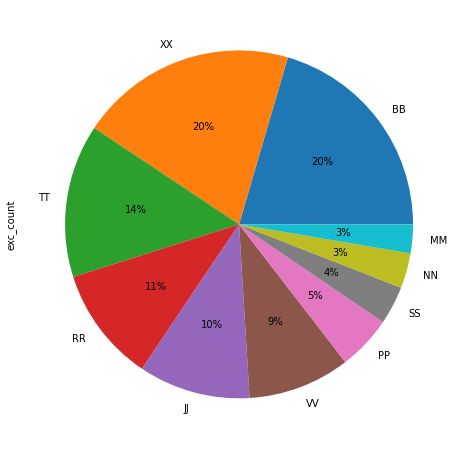

In [101]:
# Groupby for an exception count per country
df_vs=df_report.groupby(['Country','C_No_by_Cntry'],as_index=False)['Customer_ID'].count()
df_vs.rename(columns={'Customer_ID':'exc_count'}, inplace=True)

# Sort according to exception count
df_vs.sort_values('exc_count', ascending=False, inplace=True)

# Plot exception count for top 10 countries 
df_vs.head(10).plot(kind='pie',y='exc_count',labels=df_vs['Country'], legend = False, figsize=(16,8), autopct='%1.f%%')

<AxesSubplot:xlabel='Country'>

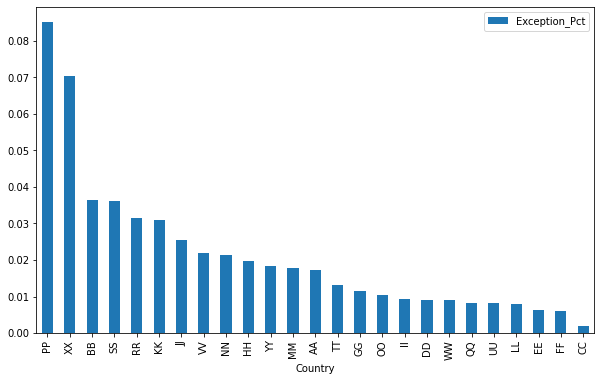

In [108]:
# Calculate exception percentage
df_vs['Exception_Pct']=df_vs['exc_count']/df_vs['C_No_by_Cntry']

# Sort according to exception percentage
df_vs.sort_values('Exception_Pct', ascending=False, inplace=True)

# Plot
df_vs.plot(x='Country',y='Exception_Pct',kind='bar',
         xlabel='Country', figsize=(10, 6))